# Facebook Data Analysis

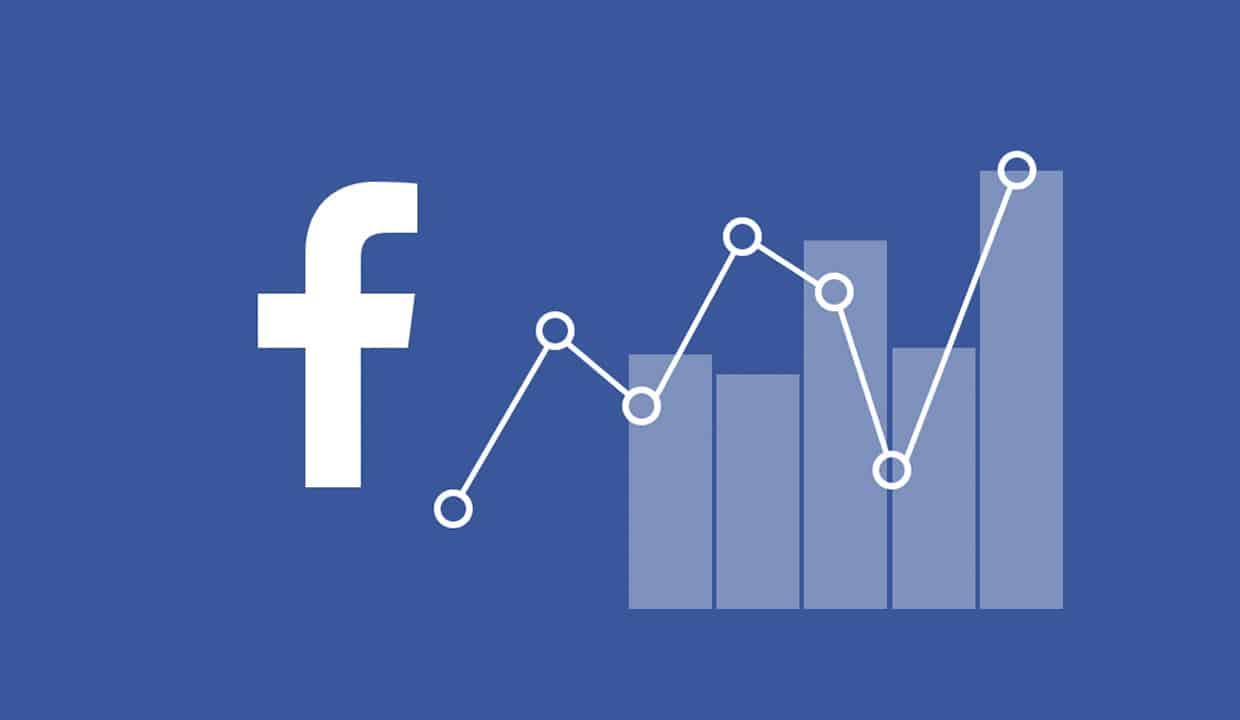

In [206]:
from IPython.display import Image
import os
Image("https://cdn.adleakscdn.com/wp-content/uploads/2017/08/FacebookAnalytics1240x720.jpg")

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
fb = pd.read_csv('facebook.csv')

In [20]:
fb.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [22]:
fb.drop(labels=['dob_day', 'dob_month'], axis=1, inplace=True)

Year wise growth in Facebook users

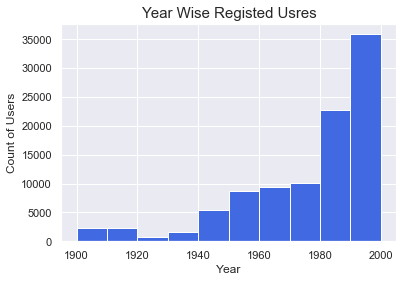

In [93]:
sns.set()
plt.hist(fb['dob_year'], color='royalblue')
plt.xlabel("Year")
plt.ylabel("Count of Users")
plt.title("Year Wise Registed Usres", size=15)
plt.show()

## Analysis based on Gender

In [35]:
gender = fb.groupby('gender').count()
gender.head()

,userid,age,dob_year,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,,,,,,,,,
female,40254,40254,40254,40252,40254,40254,40254,40254,40254,40254,40254,40254
male,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574


Text(0.5, 1.0, 'Male Users vs Female Users')

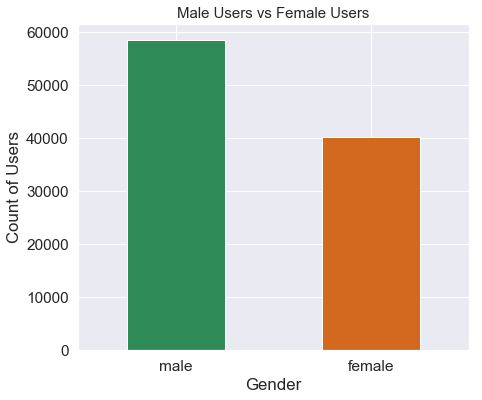

In [151]:
sns.set(font_scale=1.4)
fb['gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color=['seagreen','chocolate'])
plt.xlabel("Gender")
plt.ylabel("Count of Users")
plt.title('Male Users vs Female Users', size=15)

In [152]:
likes_based_on_gender = fb.groupby('gender').sum()
likes_based_on_gender

,userid,age,dob_year,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,,,,,,,,,
female,64315395060,1588419,79442883,23637151.0,9740258,4584894,10468106,10121282,6960437,5921399,3507665,4199879
male,93520103528,2089349,115820113,29298972.0,9666787,6037023,4959923,3977851,3529747,2391753,1430175,1586098


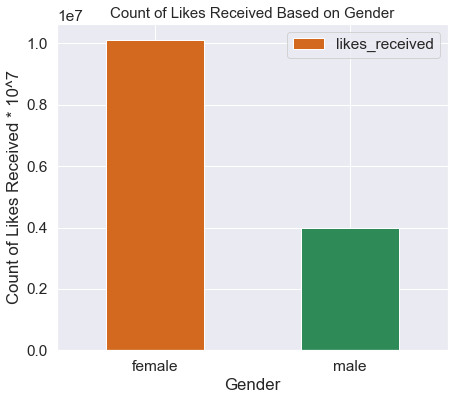

In [153]:
likes_based_on_gender.plot(y='likes_received', figsize=(7, 6), rot=0, kind='bar', color=['chocolate', 'seagreen'])
plt.ylabel('Count of Likes Received * 10^7')
plt.xlabel('Gender')
plt.title('Count of Likes Received Based on Gender', size=15)
plt.show()

## Analysis Based on Age

In [156]:
age_df = fb.groupby('age').mean()

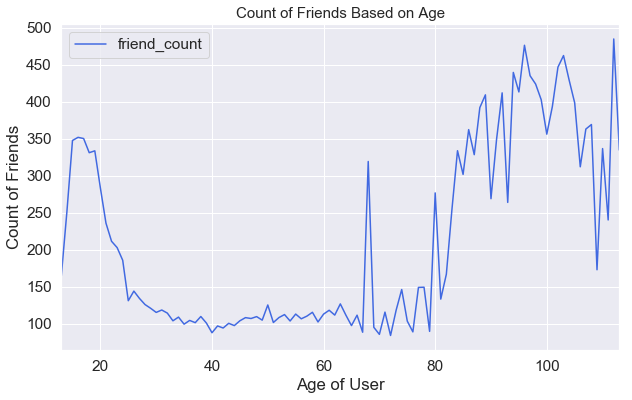

In [157]:
age_df.plot.line(y='friend_count', figsize=(10, 6), color='royalblue')
plt.ylabel('Count of Friends')
plt.xlabel('Age of User')
plt.title('Count of Friends Based on Age', size=15)
plt.show()

## Analysis for Different Age Groups: below 18, 18-35, 36-75 & above 75

###  Age Group Below 18 

In [183]:
bw_below_18_df = fb[(fb['age']<18)]

In [186]:
bw_below_18_df.head(3)

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,1999,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,1999,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,1999,male,13.0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Count of Users')

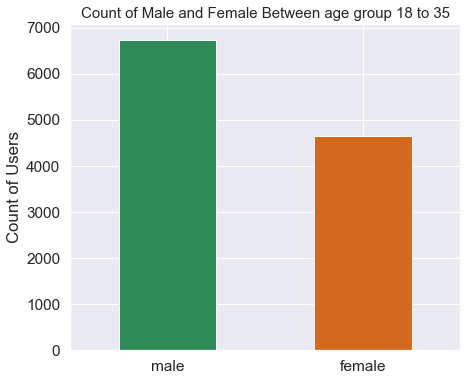

In [184]:
bw_below_18_df['gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color=['seagreen','chocolate'])
plt.title('Count of Male and Female Between age group 18 to 35', size=15)
plt.ylabel("Count of Users")

/Users/madhavikadam/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


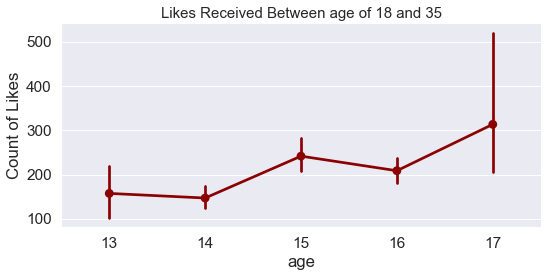

In [190]:
sns.factorplot(x='age', y='likes_received', data=bw_below_18_df, figsize=(10, 6), color='darkred', height=4, aspect=2)
plt.title('Likes Received Between age of 18 and 35', size=15)
plt.ylabel('Count of Likes')
plt.show()

### Age Group Between 18-35

In [191]:
bw_18_35_df = fb[(fb['age']<=35)&(fb['age']>=18)]

In [192]:
bw_18_35_df.head(3)

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
153,1590837,18,1995,male,587.0,0,0,0,0,0,0,0,0
154,1124403,18,1995,male,577.0,0,0,0,0,0,0,0,0
155,1364002,18,1995,male,80.0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Count of Users')

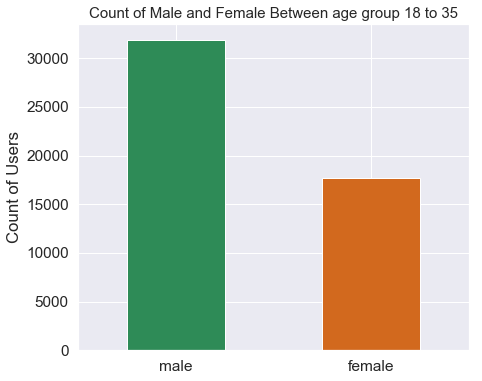

In [193]:
bw_18_35_df['gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color=['seagreen','chocolate'])
plt.title('Count of Male and Female Between age group 18 to 35', size=15)
plt.ylabel("Count of Users")

/Users/madhavikadam/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


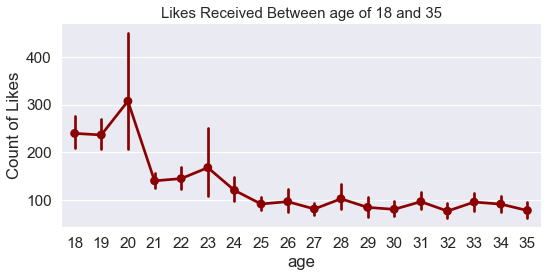

In [189]:
sns.factorplot(x='age', y='likes_received', data=bw_18_35_df, figsize=(10, 6), color='darkred', height=4, aspect=2)
plt.title('Likes Received Between age of 18 and 35', size=15)
plt.ylabel('Count of Likes')
plt.show()

### Age Group Between 36-75

In [201]:
bw_36_75_df = fb[(fb['age']<=75)&(fb['age']>=36)]

In [202]:
bw_36_75_df.head(3)

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1166,2014389,36,1977,female,661.0,0,0,0,0,0,0,0,0
1167,1780518,36,1977,male,149.0,0,0,0,0,0,0,0,0
1168,1120350,36,1977,male,17.0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Count of Users')

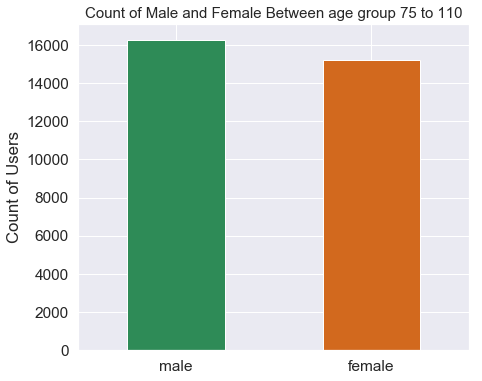

In [203]:
bw_36_75_df['gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color=['seagreen','chocolate'])
plt.title('Count of Male and Female Between age group 75 to 110', size=15)
plt.ylabel("Count of Users")

/Users/madhavikadam/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


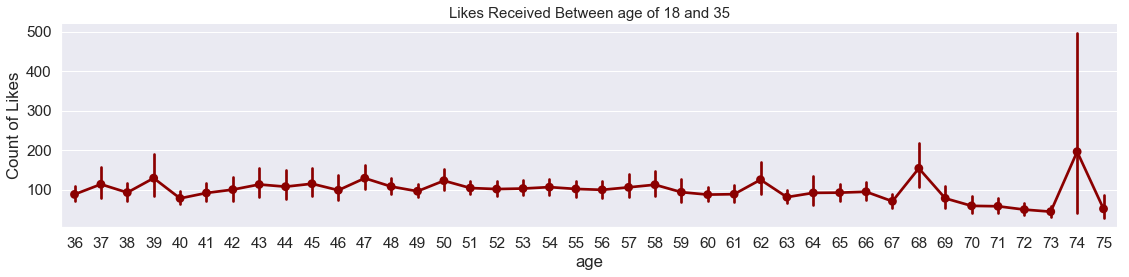

In [204]:
sns.factorplot(x='age', y='likes_received', data=bw_36_75_df, figsize=(10, 6), color='darkred', height=4, aspect=4)
plt.title('Likes Received Between age of 18 and 35', size=15)
plt.ylabel('Count of Likes')
plt.show()

### Age Group Above 75

In [197]:
bw_above_75_df = fb[(fb['age']>75)]

In [198]:
bw_above_75_df.head(3)

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1684,1849434,76,1937,male,4.0,0,0,0,0,0,0,0,0
1685,1089298,78,1935,male,469.0,0,0,0,0,0,0,0,0
1686,1517497,79,1934,female,432.0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Count of Users')

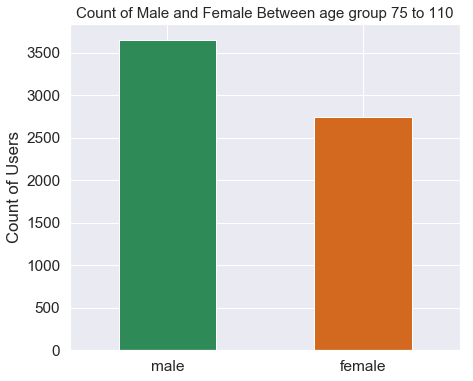

In [199]:
bw_above_75_df['gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color=['seagreen','chocolate'])
plt.title('Count of Male and Female Between age group 75 to 110', size=15)
plt.ylabel("Count of Users")

/Users/madhavikadam/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


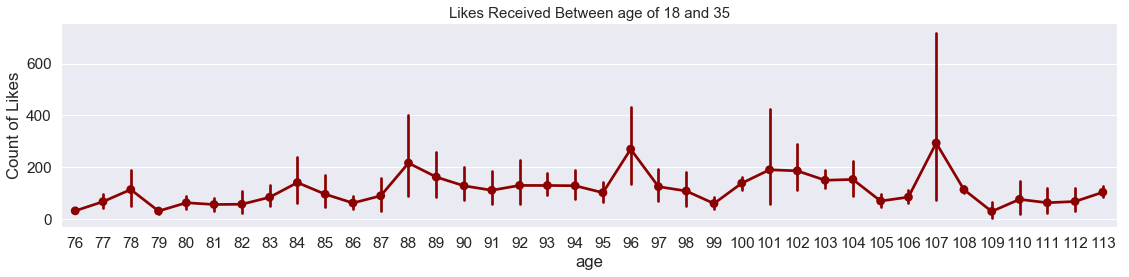

In [200]:
sns.factorplot(x='age', y='likes_received', data=bw_above_75_df, figsize=(10, 6), color='darkred', height=4, aspect=4)
plt.title('Likes Received Between age of 18 and 35', size=15)
plt.ylabel('Count of Likes')
plt.show()